In [0]:
!pip install tensorflow==2.0

In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

2.0.0


In [0]:
mnist = tf.keras.datasets.mnist.load_data()

In [0]:
(x_train, y_train), (x_test, y_test) = mnist

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                     tf.keras.layers.Dense(140,activation='relu'),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(10,activation='softmax')])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
r = model.fit(x_train,y_train, epochs = 10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2876 - accuracy: 0.9165 - val_loss: 0.1402 - val_accuracy: 0.9570
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1363 - accuracy: 0.9595 - val_loss: 0.0941 - val_accuracy: 0.9719
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1042 - accuracy: 0.9688 - val_loss: 0.0803 - val_accuracy: 0.9746
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0843 - accuracy: 0.9743 - val_loss: 0.0788 - val_accuracy: 0.9762
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0710 - accuracy: 0.9777 - val_loss: 0.0781 - val_accuracy: 0.9763
Epoch 6/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0633 - accuracy: 0.9797 - val_loss: 0.0702 - val_accuracy: 0.9781
Epoch 7/10
60000/60000 [==========================

In [0]:
import matplotlib.pyplot as plt


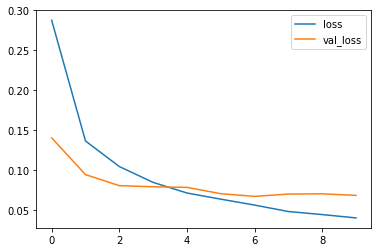

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

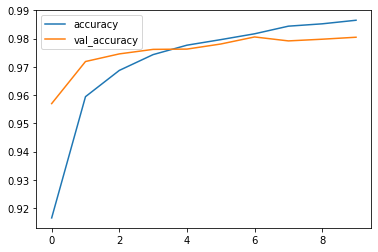

In [0]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [0]:
print(model.evaluate(x_test,y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix

In [0]:
p_test = model.predict(x_test).argmax(axis=1)

In [0]:
p_test.shape

(10000,)

In [0]:
y_test.shape

(10000,)

In [0]:
wrong = np.where(y_test!=p_test)[0]

Text(0.5, 1.0, 'Is 9 should be 4')

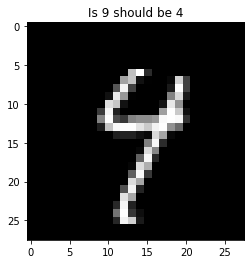

In [0]:
c=np.random.choice(wrong)
plt.imshow(x_test[c],cmap='gray')
plt.title("Is {} should be {}".format(p_test[c],y_test[c]))